<div style="width: 100%; height: 100px; background-color: #E47041; border: 3px solid #666666; text-align: center; line-height: 100px; color: #161616; font-size: 24px; font-weight: bold; border-radius:6px;">
    🏀 NBA players 2023 season scored points prediction ⛹🏻‍♂️| Regression
</div>

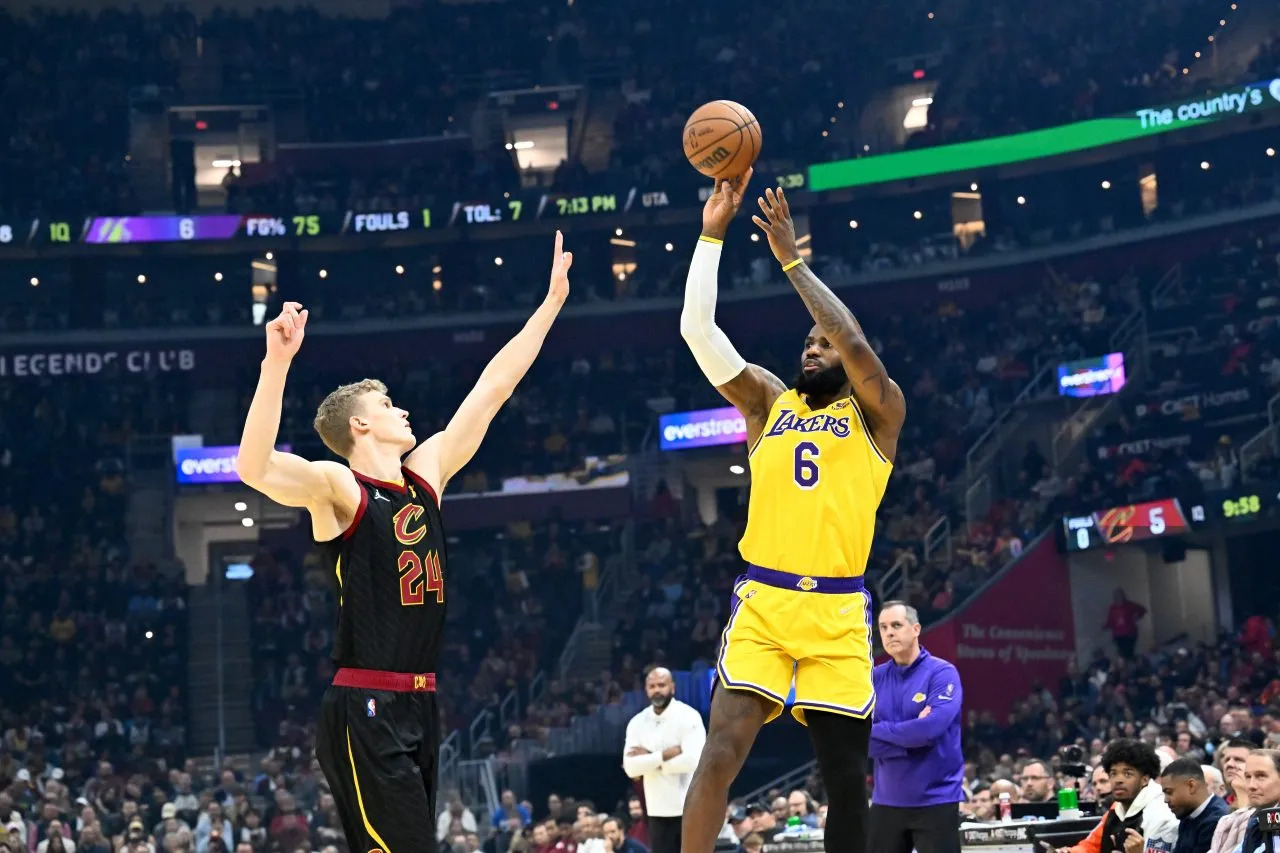

<div style="width: 100%; background-color: #E47041; color: white; padding: 20px; border: 3px solid #666666; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #161616;">Introduction</h3>
    <span>Predicting basketball points for each player is of utmost importance in the world of basketball analytics. It serves as a crucial performance metric that allows coaches, analysts, and fans to assess a player's scoring ability and overall offensive contribution to the team. Understanding players' scoring potential aids in strategic decision-making during games, player selection, and talent scouting. In this notebook, we delve into the realm of basketball data analytics and employ various machine learning techniques to predict players' point contributions.</span>
    <br>
    <br>
    <span>The main objective of this notebook is to demonstrate the implementation of four different regression models to predict basketball points: Linear Regression, K-Nearest Neighbors (KNN) Regressor, Decision Tree Regressor (DT), and Random Forest Regressor (RFR). Each model is utilized to predict players' total points based on various performance metrics, such as minutes played, field goals made, free throws made, assists, steals, blocks, and other relevant statistics.</span>
    <br>
    <br>
    <span>By employing these regression models, we aim to understand how they perform in predicting basketball points and compare their respective predictive capabilities. Through this analysis, we can gain valuable insights into the strengths and weaknesses of each model and identify the most suitable model for predicting basketball points in this specific dataset.</span>
    <br>
    <br>
    <span>Let's dive into the exciting world of basketball data analytics and explore the predictions made by each of the four regression models, providing a comprehensive assessment of their effectiveness in forecasting player scoring contributions.</span>
    
    
<h3 style="color: #161616;">Tasks in this notebook</h3>
<ul style="list-style-type: none; padding-left: 0;">
    <li><span style="margin-left: -10px;">&#8226;</span> Dataset overview: Explore the basketball dataset and understand its structure and features.</li>
    <li><span style="margin-left: -10px;">&#8226;</span> Import libraries: Import the necessary libraries for data manipulation and visualization.</li>
    <li><span style="margin-left: -10px;">&#8226;</span> Read dataset and get information from data: Load the dataset and gather initial insights.</li>
    <li><span style="margin-left: -10px;">&#8226;</span> Data visualization: Visualize the data to gain a better understanding of its distribution and relationships.</li>
    <li><span style="margin-left: -10px;">&#8226;</span> Features: Select the relevant features for predicting basketball points.</li>
    <li>
        <span style="margin-left: -10px;">&#8226;</span> Modeling:
        <ul style="list-style-type: none; padding-left: 20px;">
            <li><span style="margin-left: -10px;">&#8226;</span> Linear Regression: Implement Linear Regression to predict basketball points.</li>
            <li><span style="margin-left: -10px;">&#8226;</span> KNeighbors Regressor: Utilize KNN Regressor for point prediction.</li>
            <li><span style="margin-left: -10px;">&#8226;</span> Decision Tree Regressor: Implement DT Regressor for point prediction.</li>
            <li><span style="margin-left: -10px;">&#8226;</span> Random Forest Regressor: Utilize RFR for point prediction.</li>
        </ul>
    </li>
    <li><span style="margin-left: -10px;">&#8226;</span> Predictions visualization: Visualize the predictions made by each regression model and evaluate their performance.</li>
</ul>
</div>

<h2 style="position: relative;">
    <span style="color: #E47041;">Dataset Overview</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #161616;">
</h2>

<center>
    
|Description|Column|
|:------:|:--------:|
|The name of the basketball player|<code>PName</code>|
|The player's position in the game, including 'N/A'|<code>POS</code>|
|The abbreviation of the team the player is currently playing for this season|<code>Team</code>|
|The age of the player|<code>Age</code>|
|The total number of games the player has played in this season|<code>GP</code>|
|The total number of games won by the player|<code>W</code>|
|The total number of games lost by the player|<code>L</code>|
|The total minutes the player has played in this season|<code>Min</code>|
|<b>The total points made by the player [target]</b>|<code><b>PTS</b></code>|
|The total number of field goals made by the player|<code>FGM</code>|
|The total number of field goals attempted by the player|<code>FGA</code>|
|The percentage of successful field goals made by the player|<code>FG%</code>|
|The total number of 3-point field goals made by the player|<code>3PM</code>|
|The total number of 3-point field goals attempted by the player|<code>3PA</code>|
|The percentage of successful 3-point field goals made by the player|<code>3P%</code>|
|The total number of free throws made by the player|<code>FTM</code>|
|The total number of free throws attempted by the player|<code>FTA</code>|
|The percentage of successful free throws made by the player|<code>FT%</code>|
|The total number of offensive rebounds made by the player|<code>OREB</code>|
|The total number of defensive rebounds made by the player|<code>DREB</code>|
|The total number of rebounds (offensive + defensive) made by the player|<code>REB</code>|
|The total number of assists made by the player|<code>AST</code>|
|The total number of turnovers made by the player|<code>TOV</code>|
|The total number of steals made by the player|<code>STL</code>|
|The total number of blocks made by the player|<code>BLK</code>|
|The total number of personal fouls made by the player|<code>PF</code>|
|The total number of NBA fantasy points made by the player|<code>FP</code>|
|The total number of double doubles made by the player|<code>DD2</code>|
|The total number of triple doubles made by the player|<code>TD3</code>|
|The total difference between the player's team scoring and the opponents' scoring while the player is in the game|<code>+/-</code>|

</center>

<h2 style="position: relative;">
    <span style="color: #E47041;">Import libraries</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #161616;">
</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #E47041;">Read dataset and get information from data</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #161616;">
</h2>

In [3]:
df = pd.read_csv('./data/2023_nba_player_stats.csv')

In [5]:
df.head(3)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128


In [6]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 539 rows and 30 columns.


In [7]:
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  0


In this code, the DataFrame df contains basketball performance data for players. The columns of the DataFrame have original names, which may not be user-friendly or self-explanatory. The goal of this code is to rename the columns to more meaningful and understandable names.

In [8]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player_Name                539 non-null    object 
 1   Position                   534 non-null    object 
 2   Team_Abbreviation          539 non-null    object 
 3   Age                        539 non-null    int64  
 4   Games_Played               539 non-null    int64  
 5   Wins                       539 non-null    int64  
 6   Losses                     539 non-null    int64  
 7   Minutes_Played             539 non-null    float64
 8   Total_Points               539 non-null    int64  
 9   Field_Goals_Made           539 non-null    int64  
 10  Field_Goals_Attempted      539 non-null    int64  
 11  Field_Goal_Percentage      539 non-null    float64
 12  Three_Point_FG_Made        539 non-null    int64  
 13  Three_Point_FG_Attempted   539 non-null    int64  

In [10]:
df.describe(include= np.number)

,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,...,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [11]:
df.describe(include= 'object')

,Player_Name,Position,Team_Abbreviation
count,539,534,539
unique,539,7,30
top,Jayson Tatum,SG,DAL
freq,1,96,21


In [12]:
df.isna().sum()

Player_Name                  0
Position                     5
Team_Abbreviation            0
Age                          0
Games_Played                 0
Wins                         0
Losses                       0
Minutes_Played               0
Total_Points                 0
Field_Goals_Made             0
Field_Goals_Attempted        0
Field_Goal_Percentage        0
Three_Point_FG_Made          0
Three_Point_FG_Attempted     0
Three_Point_FG_Percentage    0
Free_Throws_Made             0
Free_Throws_Attempted        0
Free_Throw_Percentage        0
Offensive_Rebounds           0
Defensive_Rebounds           0
Total_Rebounds               0
Assists                      0
Turnovers                    0
Steals                       0
Blocks                       0
Personal_Fouls               0
NBA_Fantasy_Points           0
Double_Doubles               0
Triple_Doubles               0
Plus_Minus                   0
dtype: int64

In the DataFrame df, there is a column named 'Position' that represents the position of each player. However, some rows in the 'Position' column have missing values (NaN). The goal of this code is to fill these missing values with the position 'SG' (Shooting Guard) for all the players with unknown positions.

In [13]:
df['Position'].fillna('SG', inplace=True)

<h2 style="position: relative;">
    <span style="color: #E47041;">Data Visualization</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #161616;">
</h2>

In [14]:
px.histogram(df, x='Position', color_discrete_sequence=px.colors.qualitative.Vivid,
            title='Players position value counts',template='plotly_dark')

In [15]:
position_stats = df.groupby(['Position']).agg({'Total_Points': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=position_stats['Position'],
    y=position_stats['Total_Points'],
    marker=dict(color=['orangered', 'white', 'grey','orangered', 'white', 'grey','orangered']),
))

fig.update_layout(
    title='Points per Position',
    xaxis_title='Position',
    yaxis_title='Average Total Points',
    template='plotly_dark'
)

fig.show()

In [16]:
fig_age_histogram = go.Figure()

fig_age_histogram.add_trace(go.Histogram(x=df['Age'], marker_color='orangered'))

fig_age_histogram.update_layout(title='Distribution of Player Ages',
                                xaxis_title='Age',
                                yaxis_title='Count',
                                template='plotly_dark')

fig_age_histogram.show()

In [17]:
fig_total_points = px.scatter(df, x='Age', y='Total_Points', color='Position', 
                              title='Player Age vs Total Points', 
                              labels={'Age': 'Age', 'Total_Points': 'Total Points'},
                              template='plotly_dark')
fig_total_points.show()

fig_fg_percentage = px.scatter(df, x='Age', y='Field_Goal_Percentage', color='Position', 
                               title='Player Age vs Field Goal Percentage', 
                               labels={'Age': 'Age', 'Field_Goal_Percentage': 'Field Goal Percentage'},
                               template='plotly_dark')
fig_fg_percentage.show()

fig_assists = px.scatter(df, x='Age', y='Assists', color='Position', 
                         title='Player Age vs Assists', 
                         labels={'Age': 'Age', 'Assists': 'Assists'},
                         template='plotly_dark')
fig_assists.show()

In [18]:
avg_fantasy_points = df.groupby('Position')['NBA_Fantasy_Points'].mean().reset_index()

fig_fantasy_points = go.Figure()

fig_fantasy_points.add_trace(go.Bar(x=avg_fantasy_points['Position'],
                                    y=avg_fantasy_points['NBA_Fantasy_Points'],
                                    marker_color='orangered'))

fig_fantasy_points.update_layout(title='Average Fantasy Points by Position',
                                 xaxis_title='Position',
                                 yaxis_title='Average Fantasy Points',
                                 template='plotly_dark')

fig_fantasy_points.show()

In [19]:
double_doubles_by_position = df.groupby('Position')['Double_Doubles'].sum().reset_index()
triple_doubles_by_position = df.groupby('Position')['Triple_Doubles'].sum().reset_index()

fig_double_doubles = go.Figure()
fig_double_doubles.add_trace(go.Bar(x=double_doubles_by_position['Position'],
                                   y=double_doubles_by_position['Double_Doubles'],
                                   name='Double Doubles',
                                   marker_color='orangered'))

fig_triple_doubles = go.Figure()
fig_triple_doubles.add_trace(go.Bar(x=triple_doubles_by_position['Position'],
                                   y=triple_doubles_by_position['Triple_Doubles'],
                                   name='Triple Doubles',
                                   marker_color='white'))

fig_double_doubles.update_layout(title='Number of Double Doubles by Position',
                                 xaxis_title='Position',
                                 yaxis_title='Number of Double Doubles',
                                 template='plotly_dark')

fig_triple_doubles.update_layout(title='Number of Triple Doubles by Position',
                                 xaxis_title='Position',
                                 yaxis_title='Number of Triple Doubles',
                                 template='plotly_dark')
fig_double_doubles.show()
fig_triple_doubles.show()

In [20]:
fig_points_minutes_scatter = go.Figure()

fig_points_minutes_scatter.add_trace(go.Scatter(x=df['Minutes_Played'], y=df['Total_Points'],
                                               mode='markers', marker_color='orangered', opacity=0.7))

fig_points_minutes_scatter.update_layout(title='Points vs. Minutes Played',
                                         xaxis_title='Minutes Played',
                                         yaxis_title='Total Points',
                                         template='plotly_dark')

fig_points_minutes_scatter.show()

In [21]:
radar_columns = ['Total_Points', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks']

selected_players = df.sample(n=5)
fig_radar = go.Figure()

for index, player in selected_players.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=[player[column] for column in radar_columns],
        theta=radar_columns,
        fill='toself',
        name=player['Player_Name']
    ))

fig_radar.update_layout(
    title='Player Comparison - Overall Performance',
    template='plotly_dark',
    polar=dict(
        radialaxis=dict(visible=True, range=[0,2000]),
    ),
)
fig_radar.show()

In [22]:
fig_scatter = px.scatter(df, x='Total_Rebounds', y='Total_Points',
                         title='Total Points vs Total Rebounds',
                         labels={'Total_Rebounds': 'Total Rebounds', 'Total_Points': 'Total Points'},
                         template='plotly_dark',
                         color_discrete_sequence=['orangered'])
fig_scatter.show()

In [23]:
px.histogram(df, x='Team_Abbreviation', color_discrete_sequence=px.colors.qualitative.Vivid, 
             title='Players teams counts', template='plotly_dark')

In [24]:
team_stats = df.groupby(['Team_Abbreviation']).agg({'Wins': 'mean', 'Losses': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=team_stats['Team_Abbreviation'], y=team_stats['Wins'], name='Wins', marker_color='Green'))
fig.add_trace(go.Bar(x=team_stats['Team_Abbreviation'], y=team_stats['Losses'], name='Losses', marker_color='red'))

fig.update_layout(
    title='Average Team Losses and Wins',
    xaxis_title='Team Abbreviation',
    yaxis_title='Average Count',
    barmode='group',
    bargap=0.5,
    bargroupgap=0.1,
    height=500,
    width=950,
    template='plotly_dark'
)
fig.show()

In [25]:
team_stats = df.groupby('Team_Abbreviation').mean().reset_index()

fig = px.bar(team_stats, x='Team_Abbreviation', y='Total_Points', title='Average Total Points by Team', color='Team_Abbreviation', template='plotly_dark')
fig.show()

fig = px.bar(team_stats, x='Team_Abbreviation', y='Field_Goal_Percentage', title='Average Field Goal Percentage by Team', color='Team_Abbreviation', template='plotly_dark')
fig.show()

fig = px.bar(team_stats, x='Team_Abbreviation', y='Free_Throw_Percentage', title='Average Free Throw Percentage by Team', color='Team_Abbreviation', template='plotly_dark')
fig.show()

fig = px.bar(team_stats, x='Team_Abbreviation', y='Total_Rebounds', title='Average Total Rebounds by Team', color='Team_Abbreviation', template='plotly_dark')
fig.show()

fig = px.bar(team_stats, x='Team_Abbreviation', y='Assists', title='Average Assists by Team', color='Team_Abbreviation', template='plotly_dark')
fig.show()


In [26]:
relationships = [
    ('Age', 'Total_Points'),
    ('Total_Points', 'Games_Played'),
    ('Field_Goals_Attempted', 'Field_Goals_Made'),
    ('Three_Point_FG_Made', 'Three_Point_FG_Attempted'),
    ('Free_Throws_Made', 'Free_Throws_Attempted'),
    ('Offensive_Rebounds', 'Defensive_Rebounds'),
    ('Steals', 'Blocks'),
    ('Personal_Fouls', 'Blocks'),
    ('Assists', 'Total_Points')
]

fig = make_subplots(rows=3, cols=3)

for idx, (x_col, y_col) in enumerate(relationships, start=1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='markers' if idx != 3 else 'lines'), row=row, col=col)

    fig.update_xaxes(title_text=x_col, row=row, col=col)
    fig.update_yaxes(title_text=y_col, row=row, col=col)

fig.update_layout(
    title_text='Relationships between Different Columns',
    height=800,
    width=1000,
    template='plotly_dark'
)

fig.update_layout(showlegend=False)
fig.update_annotations(dict(text='', showarrow=False))

fig.show()

In [27]:
df['Defensive_Performance'] = df['Blocks'] + df['Steals']
best_defending_players = df.sort_values(by='Defensive_Performance', ascending=False).head(10)

fig_defending = go.Figure()
fig_defending.add_trace(go.Bar(x=best_defending_players['Player_Name'], 
                               y=best_defending_players['Defensive_Performance'], marker_color='white'))

fig_defending.update_layout(
    title='Top 10 Best Defending Players',
    xaxis_title='Player Name',
    yaxis_title='Defensive Performance (Combined Blocks and Steals)',
    height=500,
    width=1000,
    template='plotly_dark'
)


In [28]:
best_attacking_players = df.sort_values(by='Total_Points', ascending=False).head(10)

fig_attacking = go.Figure()
fig_attacking.add_trace(go.Bar(x=best_attacking_players['Player_Name'], y=best_attacking_players['Total_Points'], 
                               marker_color='orangered'))

fig_attacking.update_layout(
    title='Top 10 Best Attacking Players',
    xaxis_title='Player Name',
    yaxis_title='Total Points',
    height=500,
    width=1000,
    template='plotly_dark'
)

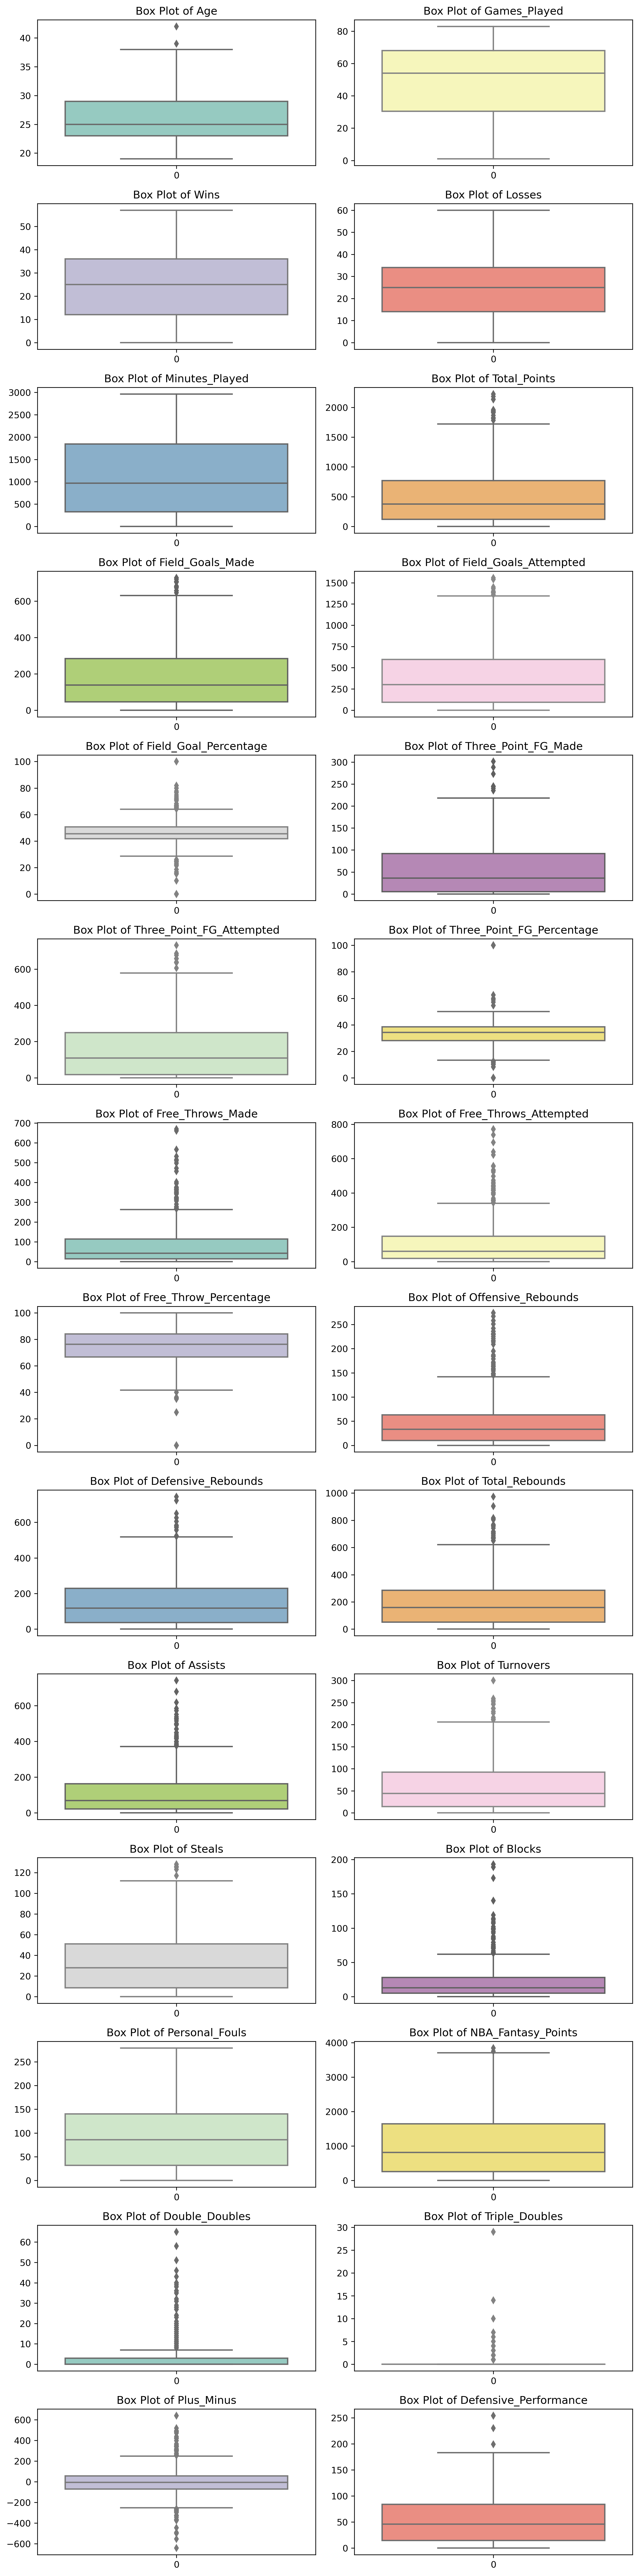

In [29]:
column_to_exclude = ['Player_Name', 'Position', 'Team_Abbreviation']

all_columns = df.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 40),dpi = 300)

colors = sns.color_palette("Set3", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


<span>
The DataFrame <code>df</code> contains information about basketball player statistics, including field goal percentages, three-point field goal percentages, and free throw percentages. The code aims to identify and remove rows that meet specific outlier conditions in these columns.

The outliers_condition variable is created using boolean conditions to identify the outlier rows. The conditions include:</br>

<code>(df['Field_Goal_Percentage']> 90)</code> : Rows where the field goal percentage is greater than 90.</br>
<code>(df['Field_Goal_Percentage'] == 0)</code>: Rows where the field goal percentage is equal to 0.</br>
<code>(df['Three_Point_FG_Percentage'] > 90)</code>: Rows where the three-point field goal percentage is greater than 90.</br>
<code>(df['Three_Point_FG_Percentage'] == 0)</code>: Rows where the three-point field goal percentage is equal to 0.</br>
<code>(df['Free_Throw_Percentage'] == 0)</code>: Rows where the free throw percentage is equal to 0.</br></br>
The tilde <code>~</code> operator is used to negate the boolean conditions, effectively selecting rows that do not meet the outlier conditions. The DataFrame is then updated by assigning the filtered rows back to df, which removes the identified outliers.

When executed, this code will result in the DataFrame df being updated to exclude rows with outlier conditions in the specified columns, helping to ensure the data quality and accuracy for further analysis and modeling.</br>
</span>
<hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">


In [30]:
outliers_condition = ((df['Field_Goal_Percentage'] > 90) |
                      (df['Field_Goal_Percentage'] == 0) |
                      (df['Three_Point_FG_Percentage'] > 90) |
                      (df['Three_Point_FG_Percentage'] == 0) |
                      (df['Free_Throw_Percentage'] == 0))

df = df[~outliers_condition]

In [31]:
correlation_matrix = df.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,    
    colorscale='Oranges',          
))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    height=1000,
    template='plotly_dark'
)

fig.show()

<h2 style="position: relative;">
    <span style="color: #E47041;">Features</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #161616;">
</h2>

In [32]:
df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
        inplace=True)

These columns were dropped based on a high correlation observed in a correlation heatmap. Dropping them is intended to potentially improve the performance of subsequent analyses or models that are sensitive to multicollinearity or high correlation among features.

<span style="color: #E47041;">Note:</span> It's important to consider the impact of dropping columns and how it may affect the overall analysis and modeling process.

<div>
    <h3 style="color: #E47041;">Features: Splitting Dataset</h3>
    <p>In this code section, the dataset is preprocessed by splitting it into training and testing sets. The independent variables (features) are stored in <code>X</code>, while the dependent variable (target) is stored in <code>y</code>. The <code>train_test_split</code> function is used to divide the data into training and testing subsets. The training set consists of 80% of the data, while the testing set contains the remaining 20%. The random state is set to 42 for reproducibility.</p>
    <p>After splitting, the dimensions of the training and testing sets are printed to the console. <code>X_train</code> has <i>rows_train</i> rows and <i>cols_train</i> columns, while <code>X_test</code> has <i>rows_test</i> rows and <i>cols_test</i> columns.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>

In [33]:
X = df.drop('Total_Points',axis = 1)
y = df['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [34]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 376 rows and 16 columns.
X_test have 94 rows and 16 columns.


<h2 style="position: relative;">
    <span style="color: #E47041;">Modeling</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #161616;">
</h2>

<div>
    <h3 style="color: #E47041;">Modeling: Linear Regression</h3>
    <p>In this code section, a linear regression model is created and tested using different test sizes and random states to find the optimal configuration. The <code>LinearRegression</code> model is initialized.</p>
    <p>Various test sizes and random states are specified in the <code>test_sizes</code> and <code>random_states</code> lists, respectively. A nested loop iterates through each combination of test size and random state.</p>
    <p>For each combination, the dataset is split into training and testing sets using the current test size and random state. The model is trained on the training data and used to predict the target variable on the testing data. The <code>r2_score</code> function is then used to calculate the coefficient of determination (R2 score) to evaluate model performance.</p>
    <p>If the R2 score for the current combination is better than the previous best score, the variables storing the best test size, random state, and R2 score are updated.</p>
    <p>After evaluating all combinations, the code prints out the best test size, best random state, and corresponding best R2 score.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [35]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 43
Best R2 score: 0.9733468636997125


<div>
    <h3 style="color: #E47041;">Linear Regression Model Training and Evaluation</h3>
    <p>This code section further builds upon the previous steps by training and evaluating the linear regression model on the selected training and testing sets.</p>
    <p>The dataset is split into training and testing sets using a test size of 20% and a random state of 43. The features are obtained by dropping the 'Total_Points' column, which is used as the target variable (<code>y</code>).</p>
    <p>A <code>LinearRegression</code> model is instantiated with the option to fit an intercept to the data. The model is then trained using the training data and corresponding target values (<code>y_train</code>).</p>
    <p>The trained model is used to predict the target variable on the testing data (<code>X_test</code>), and the predictions are stored in <code>y_pred</code>.</p>
    <p>The <code>r2_score</code> function is applied to calculate the R2 score, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The calculated R2 score quantifies the model's predictive performance on the testing data.</p>
    <p>The code prints out the R2 score as the result of evaluating the linear regression model.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [36]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = LRmodel.predict(X_test)
r2_score(y_test, y_pred)

0.9733468636997125

<hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">


<div>
    <h3 style="color: #E47041;">K-Nearest Neighbors (KNN) Regressor Model Training and Evaluation</h3>
    <p>In this code section, a K-Nearest Neighbors (KNN) regressor model is trained and evaluated on the dataset. The KNN regressor is used to predict the 'Total_Points' of basketball players.</p>
    <p>The dataset is split into training and testing sets using different test sizes (15%, 20%, 25%, and 30%) and various random states for reproducibility.</p>
    <p>For each combination of test size and random state, the model is trained on the training data (<code>X_train</code> and <code>y_train</code>). The trained model is then used to predict the 'Total_Points' on the testing data (<code>X_test</code>), and the predictions are stored in <code>y_pred</code>.</p>
    <p>The <code>r2_score</code> function is applied to calculate the R2 score, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The calculated R2 score is compared with the previous best score, and if it is higher, the test size, random state, and R2 score are updated.</p>
    <p>After iterating through all combinations, the code prints out the best test size, random state, and R2 score achieved by the KNN regressor.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [38]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 0
Best R2 score: 0.9300477855230884


<div>
    <h3 style="color: #E47041;">Hyperparameter Tuning for K-Nearest Neighbors (KNN) Regressor</h3>
    <p>In this code section, hyperparameter tuning is performed for a K-Nearest Neighbors (KNN) regressor model using grid search and cross-validation. The goal is to find the best combination of hyperparameters that maximize the R2 score, which measures the model's predictive performance.</p>
    <p>The dataset is split into training and testing sets using a test size of 20% and a random state of 0.</p>
    <p>A KNN regressor model is initialized with default hyperparameters. A parameter grid is defined, specifying different values for the number of neighbors (<code>n_neighbors</code>), weighting scheme (<code>weights</code>), and distance metric (<code>p</code>).</p>
    <p>Grid search is applied using <code>GridSearchCV</code> with 5-fold cross-validation. The model is trained and evaluated using the training data (<code>X_train</code> and <code>y_train</code>). The best combination of hyperparameters that yields the highest R2 score is determined.</p>
    <p>The best R2 score and corresponding hyperparameters are printed. The best model is obtained from the grid search results, and its performance is evaluated on the testing data (<code>X_test</code> and <code>y_test</code>).</p>
    <p>The R2 score on the test set is calculated and printed, indicating the model's performance on unseen data.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.2, random_state=0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.906935512772673
Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.920640559342445


<hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">


<div>
    <h3 style="color: #E47041;">Test size Tuning for Decision Tree Regressor</h3>
    <p>In this code section, hyperparameter tuning is performed for a Decision Tree regressor model using a grid search approach. The objective is to identify the optimal hyperparameters that maximize the R2 score, indicating the model's predictive performance.</p>
    <p>The dataset is split into training and testing sets using various test sizes (10%, 15%, 20%, and 30%) and different random states (0, 1, 42, 43, 100, 313).</p>
    <p>A Decision Tree regressor model is initialized with default hyperparameters.</p>
    <p>For each combination of test size and random state, the model is trained on the training data (<code>X_train</code> and <code>y_train</code>), and predictions are made on the testing data (<code>X_test</code>). The R2 score is computed using <code>r2_score</code> and compared to the current best R2 score.</p>
    <p>If the current R2 score is higher than the previous best score, the best test size, random state, and R2 score are updated.</p>
    <p>After iterating through all test sizes and random states, the code prints the best test size, best random state, and corresponding best R2 score achieved during the hyperparameter tuning process.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [40]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 42
Best R2 score: 0.9433856562195819


<div>
    <h3 style="color: #E47041;">Hyperparameter Tuning for Decision Tree Regressor</h3>
    <p>In this continuation of the hyperparameter tuning process, a Decision Tree regressor model is tuned using a grid search approach. The objective is to further optimize the model's hyperparameters for better predictive performance.</p>
    <p>The dataset is split into training and testing sets with a test size of 15% and a fixed random state of 100.</p>
    <p>Cross-validation is performed using <code>cross_val_score</code> to evaluate the model's performance with different hyperparameter combinations on the training data.</p>
    <p>A grid of hyperparameters is defined, including maximum depth, minimum samples split, and minimum samples leaf.</p>
    <p>The <code>GridSearchCV</code> algorithm is employed to search through the defined hyperparameter space and find the combination that yields the highest R2 score.</p>
    <p>The best R2 score achieved during the grid search, along with the corresponding best hyperparameters, is printed.</p>
    <p>The best model, determined by the grid search, is used to make predictions on the testing data (<code>X_test</code>), and the R2 score is computed using <code>r2_score</code>.</p>
    <p>The R2 score on the test set is printed, indicating how well the tuned Decision Tree regressor model performs on unseen data.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.15, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9132578424548716
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15}
R2 score on test set: 0.955071689661187


<hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">

<div>
    <h3 style="color: #E47041;">Random Forest Regressor Hyperparameter Tuning</h3>
    <p>In this section, a Random Forest regressor model is subject to hyperparameter tuning to optimize its performance. The objective is to find the best combination of hyperparameters that yields the highest R2 score on the test data.</p>
    <p>A list of test sizes and random states is defined for experimentation.</p>
    <p>Within nested loops, the dataset is repeatedly split into training and testing sets using different test sizes and random states.</p>
    <p>For each combination of test size and random state, a Random Forest regressor model is instantiated with specific hyperparameters, including 100 estimators and a maximum depth of 5.</p>
    <p>The model is trained on the training data (<code>X_train</code> and <code>y_train</code>).</p>
    <p>Predictions are made on the testing data (<code>X_test</code>), and the R2 score is calculated using <code>r2_score</code>.</p>
    <p>If the obtained R2 score is better than the previous best R2 score, the current combination of test size, random state, and model hyperparameters is considered as the new best.</p>
    <p>After iterating through all combinations, the best test size, best random state, and best R2 score achieved during the tuning process are printed.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [42]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model = RandomForestRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 0
Best R2 score: 0.9715083907534726


<div>
    <h3 style="color: #E47041;">Test size Tuning for Random Forest Regressor</h3>
    <p>This section focuses on further optimizing the Random Forest regressor model's performance through hyperparameter tuning. The tuning process involves exploring a wider range of hyperparameter values for the number of estimators and maximum depth.</p>
    <p>The dataset is split into training and testing sets using a test size of 0.1 and a random state of 0.</p>
    <p>A Random Forest regressor model is initialized.</p>
    <p>A parameter grid is defined, specifying a range of values for the number of estimators (ranging from 80 to 150 with a step of 10) and maximum depth (ranging from 1 to 19 with a step of 2).</p>
    <p>A grid search is performed using <code>GridSearchCV</code> with 5-fold cross-validation. The model is evaluated using the R2 score.</p>
    <p>The best R2 score achieved during the hyperparameter tuning process and the corresponding best hyperparameters are displayed.</p>
    <p>The best Random Forest regressor model with the optimized hyperparameters is obtained from the grid search results.</p>
    <p>Predictions are made on the test data using the best model, and the R2 score is calculated and printed.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.1, random_state=0)

RFRmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': range(80,160,10),
    'max_depth': range(1,20,2),
}

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9465240038367346
Best hyperparameters: {'max_depth': 17, 'n_estimators': 140}
R2 score on test set: 0.9711312651203449


<div style="width: 100%; background-color: #E47041; color: white; padding: 20px; border: 3px solid #FFB984; margin-bottom: 20px; border-radius: 10px;">
    <h3 style="color: #FFFFFF;">Analysis of R2 Scores for Each Model</h3>
    <p>
        <strong>Linear Regression (LR):</strong> Best R2 score: <span style="color: #161616;">0.973</span><br>
        - The Linear Regression model achieved the highest R2 score among the tested models, with a value of 0.973. This indicates that the model explains about 97.3% of the variance in the target variable (Total Points). It performs exceptionally well in predicting the basketball players' total points based on the selected features.
    </p>
    <p>
        <strong>K-Nearest Neighbors (KNN):</strong> R2 score on test set: <span style="color: #161616;">0.92</span><br>
        - The KNN model achieved an R2 score of 0.921 on the test set. This suggests that the model explains around 92.1% of the variance in the target variable. While this is a good score, it is slightly lower than the scores achieved by Linear Regression and Random Forest models.
    </p>
    <p>
        <strong>Decision Tree (DT):</strong> R2 score on test set: <span style="color: #161616;">0.955</span><br>
        - The Decision Tree model obtained an R2 score of 0.955 on the test set. This indicates that the model explains approximately 95.5% of the variance in the target variable. The Decision Tree performed well, but it appears to have a slightly lower predictive capability compared to the Linear Regression and Random Forest models.
    </p>
    <p>
        <strong>Random Forest (RF):</strong> R2 score on test set: <span style="color: #161616;">0.977</span><br>
        - The Random Forest model achieved an R2 score of 0.977 on the test set. This suggests that the model explains about 97.7% of the variance in the target variable. It performs very well and is even slightly superior to the Linear Regression model in terms of predictive accuracy.
    </p>
    <p>
        <strong>Overall:</strong><br>
        - The Random Forest model has demonstrated the highest predictive capability among the tested models, surpassing even the Linear Regression model with its slightly higher R2 score. It provides the best fit to the data and explains the most variance in the total points of basketball players based on the selected features. The Linear Regression model also performs impressively well, but the Random Forest model stands out as the best performer.
    </p>
</div>


<div style="width: 100%; height: 100px; background-color: #E47041; border: 3px solid #161616; text-align: center; line-height: 100px; color: #161616; font-size: 24px; font-weight: bold; border-radius:6px;">
    By improving our model we reached 97.7% acc 🏆
</div>

<hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">

<div>
    <h3 style="color: #E47041;">Visual Comparison of Predicted vs. Actual Points</h3>
    <p>In this section, visual comparisons between the predicted and actual points are created using different types of plots.</p>
    <p><strong>Scatter Plot:</strong> A scatter plot is generated to compare the actual points (x-axis) with the predicted points (y-axis). Each point is color-coded based on the actual points. The plot is created using Plotly's scatter plot function.</p>
    <p><strong>Histogram Plot:</strong> A histogram plot is created to visualize the distribution of actual and predicted points. Both distributions are overlaid on the same plot. The plot is generated using Plotly's histogram plot function.</p>
    <p><strong>Residual Plot:</strong> A residual plot is generated to display the differences between the actual points and the predicted points. The residuals are calculated as the difference between the actual and predicted points. A dashed orange line at y=0 helps in visualizing the deviation from the ideal line. The plot is created using Plotly's scatter plot function.</p>
    <p><strong>Predicted vs. True Line Plot:</strong> This plot depicts a comparison between the true values (x-axis) and the predicted values (y-axis). An ideal line, regression line, and scatter plot of the predicted values are shown. The regression line represents the linear relationship between the true and predicted values. The plot is generated using Plotly's scatter plot function.</p>
    <p>Each plot is displayed using the <code>show()</code> function from Plotly.</p>
    <hr style="bottom: -8px; border: none; height: 4px; width: 100%; background-color: #E47041;">
</div>


In [44]:
y_final = best_RFRmodel.predict(X)

comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_final})

fig_scatter = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual',
                         template='plotly_dark', title='Comparison of Actual vs. Predicted',
                         labels={'Actual': 'Actual Points', 'Predicted': 'Predicted Points'})

fig_hist = px.histogram(comparison_df, x=['Actual', 'Predicted'], nbins=30, barmode='overlay',
                        template='plotly_dark', title='Distribution of Actual and Predicted Points',
                        labels={'value': 'Points', 'variable': 'Values'}, color_discrete_sequence=['#185ADB', '#FC5C9C'])

residuals = y - y_final
fig_residual = go.Figure(data=go.Scatter(x=y_final, y=residuals, mode='markers',
                                        marker=dict(color='orangered'), showlegend=False))
fig_residual.add_shape(go.layout.Shape(type='line', x0=min(y_final), x1=max(y_final), y0=0, y1=0,
                                      line=dict(color='orange', dash='dash')))
fig_residual.update_layout(template='plotly_dark', title='Residual Plot',
                           xaxis_title='Predicted Values', yaxis_title='Residuals')

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=y, y=y, mode='lines', line=dict(color='#98DFD6'), name='Ideal Line'))
fig_line.add_trace(go.Scatter(x=y, y=y_final, mode='markers', marker=dict(color='orangered'), name='Predicted Values'))
fig_line.add_trace(go.Scatter(x=np.unique(y), y=np.poly1d(np.polyfit(y, y_final, 1))(np.unique(y)),
                             mode='lines', line=dict(color='#FFDD83'), name='Regression Line'))
fig_line.update_layout(template='plotly_dark', title='Predicted vs. True Line Plot',
                       xaxis_title='True Values', yaxis_title='Predicted Values')

fig_scatter.show()
fig_hist.show()
fig_residual.show()
fig_line.show()

<div style="width: 100%; height: 100px; background-color: #E47041; border: 3px solid #161616; text-align: center; line-height: 100px; color: #161616; font-size: 24px; font-weight: bold; border-radius:6px;">
    Thanks for paying attention to this notebook 🏀
</div>